# display .wav files
## original notebook for playing with wav files

raw max val =  900
[164  92 142 165 133]
len data =  176400
sample_rate =  44100
len data in s =  4.0
176400


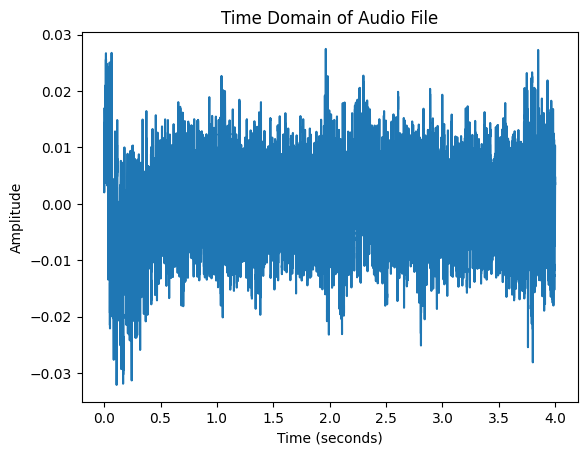

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io.wavfile

#file = "C:\\Users\\fredp\\pywork\\ECE528\\Final Project\\All data\\Black-tailed prairie dog\\CRE039_20141109_130843_19.wav"
#file = "C:\\Users\\fredp\\pywork\\ECE528\\Final Project\\test.wav"
# Read the WAV file into a NumPy array.
sample_rate, raw_audio = scipy.io.wavfile.read("test.wav")
#raw_audio = tf.io.read_file("CRE007_20140918_172601_8.wav")
#raw_audio = tf.io.read_file("CRE009_20140921_100748_15.wav")
#raw_audio = tf.io.read_file("Voice 001.wav")
#raw_audio = tf.io.read_file(file)
print('raw max val = ',raw_audio.max())

#waveform, fs = tf.audio.decode_wav(raw_audio)
#waveform = tf.squeeze(waveform, axis=-1)
print(raw_audio[:5])
print('len data = ',len(raw_audio))
print('sample_rate = ',sample_rate)
print('len data in s = ',len(raw_audio)/sample_rate)

# Create a time vector.
time = np.arange(0, len(waveform) / fs, 1 / fs)
print(len(waveform))
# Plot the audio data as a function of time.
plt.plot(time, waveform)

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Domain of Audio File")
#plt.xlim([4.675, 4.74])
plt.show()

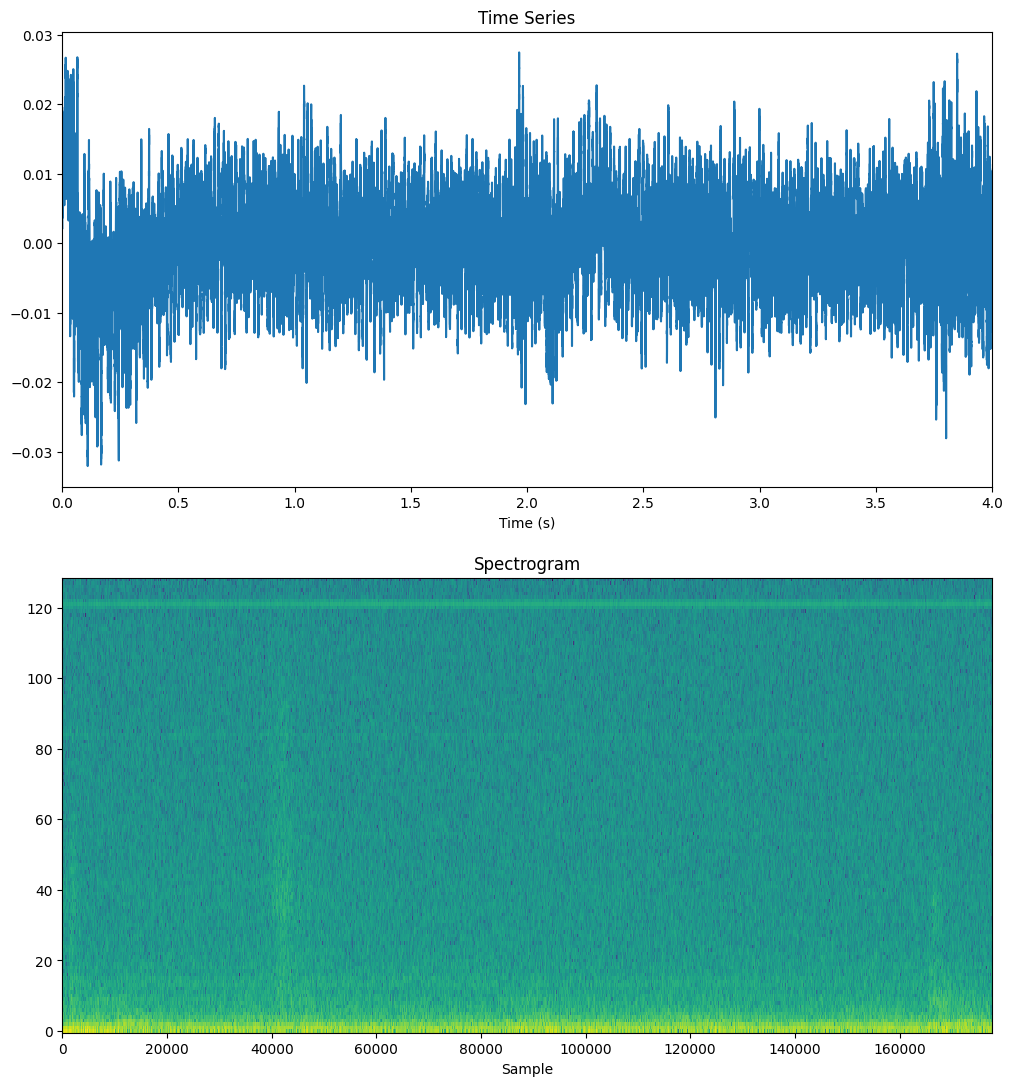

In [2]:
def get_spectrogram(waveform):
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram
        
def plot_spectrogram(fs, spectrogram, ax):
    # Convert frequencies to log scale and transpose so that time is
    # represented in the x-axis (columns). An epsilon is added to avoid log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0,np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

spectrogram = get_spectrogram(waveform)
fig,axes = plt.subplots(2,figsize=(12,13))
timescale = np.arange(waveform.shape[0])/fs
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Time Series')
axes[0].set_xlim([0, len(waveform)]/fs)
axes[0].set_xlabel('Time (s)')
plot_spectrogram(fs,spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
axes[1].set_xlabel('Sample')
plt.show()